In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

In [2]:
d = pd.read_csv("household_power_consumption.csv", sep=";")
d["date_time"] = pd.to_datetime(d["Date"]+" "+d['Time'])9
# d["Date"] =  pd.to_datetime(d["Date"])
# d['Time'] = pd.to_datetime(d['Time'], format= '%H:%M:%S' ).dt.time

d.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
date_time                datetime64[ns]
dtype: object

In [3]:
d.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,2006-12-16 17:32:00
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,2006-12-16 17:33:00


In [26]:
sorted_data = d[:1000].sort_values('date_time', ascending=True)
data = d.set_index(['date_time'])

grouped_data = data.resample("M").sum()
grouped_data["active_energy_consumed"] = (grouped_data.Global_active_power*1000/60) - grouped_data.Sub_metering_1 - grouped_data.Sub_metering_2 - grouped_data.Sub_metering_3
grouped_data.head(49)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_consumed
date_time,,,,,,,,
2006-12-31,41813.282,2889.436,5309773.22,176594.8,27460.0,48712.0,162951.0,457765.033333
2007-01-31,63795.714,5559.936,10714523.25,270547.6,72455.0,66382.0,323102.0,601322.900000
2007-02-28,46563.028,4632.204,9671130.63,197378.8,35733.0,65508.0,232883.0,441926.466667
2007-03-31,55277.564,5127.232,10711059.86,234476.0,58307.0,87919.0,280266.0,494800.733333
2007-04-30,38641.408,4788.536,9421339.38,166258.6,45958.0,53811.0,194004.0,350250.466667
2007-05-31,47374.472,5289.366,10564664.76,204375.8,73135.0,78071.0,234103.0,404265.533333
2007-06-30,38546.790,6009.400,10349711.12,166997.6,54281.0,65786.0,198972.0,323407.500000
2007-07-31,38423.900,5398.634,10548347.67,166977.4,49150.0,71283.0,202955.0,317010.333333
2007-08-31,40544.308,5449.252,10692703.92,174130.6,47951.0,63787.0,230495.0,333505.466667


<BarContainer object of 49 artists>

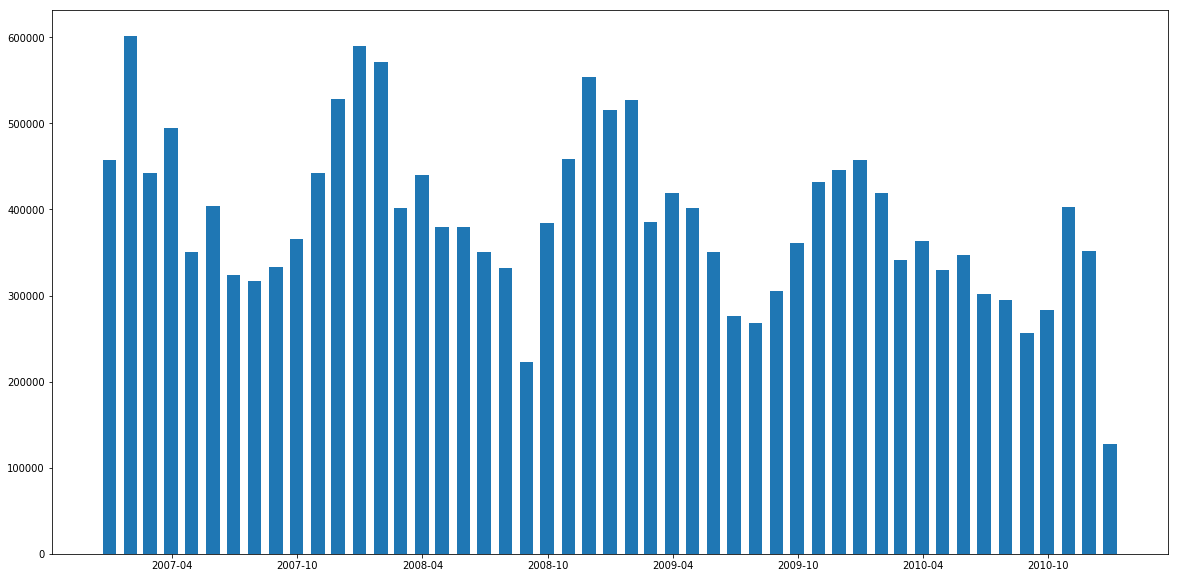

In [27]:
plt.figure(figsize=(20,10))

plt.bar(grouped_data.index, grouped_data.active_energy_consumed, width=20)

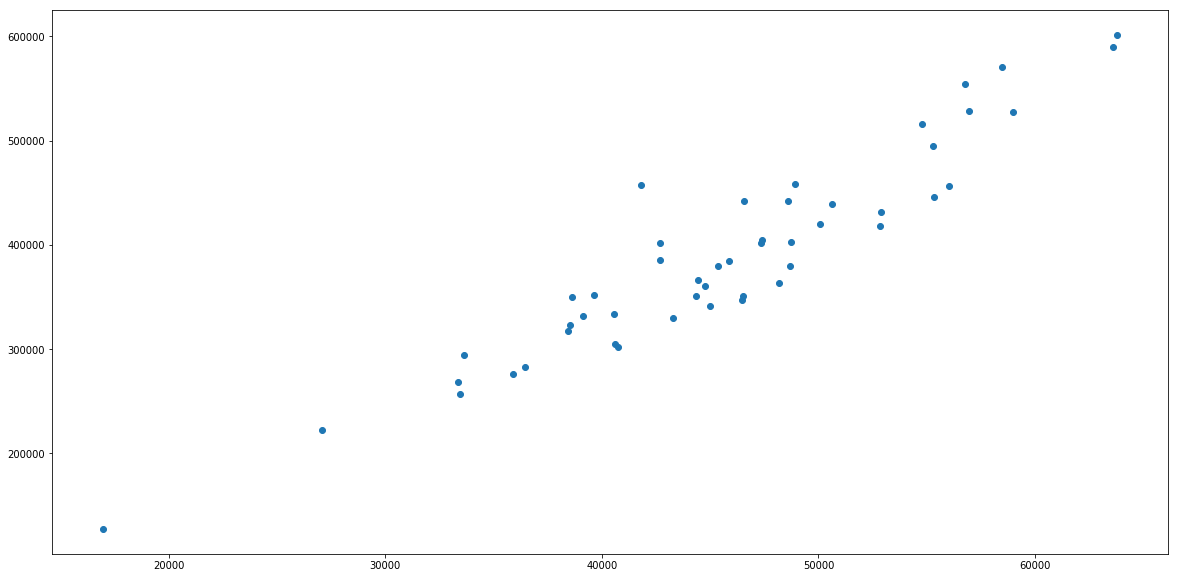

In [28]:
# plt.bar(grouped_data.index, grouped_data.Global_active_power, width=15)
plt.figure(figsize=(20,10))
plt.scatter(grouped_data.Global_active_power, grouped_data.active_energy_consumed)